# Import and Mount Google Drive
This section is to import all the different libraries for the sections bellow.

First import all nececessary libraries

In [ ]:
!pip install openai
import openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.5 MB/s eta 0:00:00


Connect Google Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

# Collecting Data
In this section the synthetic images are generated. 
To generate the images i use the diffusor model: SG161222/Realistic_Vision_V1.4


## Prompt generation

Do some prompt engineering and generate the image descriptions for synthetic generation of facial images

In [ ]:
openai.api_key = "" #API-Key provided by Rico Städeli
_default_role = "You are a very helpfull assistant and you always anwser in a JSON format."
_messages = []

json_example = [
    {
        "facedescription":"Description"
    },
    {
        "facedescription":"Description"
    }, 
    {
        "facedescription":"Description"
    }, 
    {
        "facedescription":"Description"
    }, 
    {
        "facedescription":"Description"
    }
  ]

_content = f"I need you to create 50 simple descriptions of human faces describe the hair and eyes and don't describe the shape of the face or use accessoirs. 25 of them are mens and 25 are womens Format the answer in JSON like the following example: {json_example}"

_messages.append({"role": "system", "content": _content})
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=_messages
)
image_description_json = response.choices[0].message.content

print(image_description_json)

[{'facedescription': 'She has short blonde hair and bright blue eyes.'},
{'facedescription': 'He has slicked back brown hair and dark brown eyes.'},
{'facedescription': 'She has curly black hair and hazel eyes.'},
{'facedescription': 'He has bushy grey hair and striking green eyes.'},
{'facedescription': 'She has shoulder length red hair and deep brown eyes.'},
{'facedescription': 'He has a bald head and light blue eyes.'},
{'facedescription': 'She has long brown hair and soft green eyes.'},
{'facedescription': 'He has a buzz cut and brown eyes.'},
{'facedescription': 'She has wavy blonde hair and captivating blue eyes.'},
{'facedescription': 'He has a thick beard and piercing hazel eyes.'},
{'facedescription': 'She has a messy bun and bright green eyes.'},
{'facedescription': 'He has a crew cut and light brown eyes.'},
{'facedescription': 'She has short black hair and sparkling brown eyes.'},
{'facedescription': 'He has a balding head and kind blue eyes.'},
{'facedescription': 'She ha

Create list from description string

In [ ]:
import json

string_data = image_description_json
# Replace single quotes with double quotes to make it valid JSON
string_data = string_data.replace("'", "\"")

# Convert the string to a list of dictionaries
data = json.loads(string_data)

# Create a list of face descriptions
face_descriptions = [item['facedescription'] for item in data]

print(face_descriptions)


['She has short blonde hair and bright blue eyes.', 'He has slicked back brown hair and dark brown eyes.', 'She has curly black hair and hazel eyes.', 'He has bushy grey hair and striking green eyes.', 'She has shoulder length red hair and deep brown eyes.', 'He has a bald head and light blue eyes.', 'She has long brown hair and soft green eyes.', 'He has a buzz cut and brown eyes.', 'She has wavy blonde hair and captivating blue eyes.', 'He has a thick beard and piercing hazel eyes.', 'She has a messy bun and bright green eyes.', 'He has a crew cut and light brown eyes.', 'She has short black hair and sparkling brown eyes.', 'He has a balding head and kind blue eyes.', 'She has frizzy brown hair and big brown eyes.', 'He has a goatee and caramel colored eyes.', 'She has long auburn hair and almond shaped green eyes.', 'He has a mohawk and dark brown eyes.', 'She has straight black hair and dark almond shaped eyes.', 'He has a receding hairline and blue eyes.', 'She has dyed purple hai

In [ ]:
type(face_descriptions)

list

The gneration of the description is not 100% well formated, in that case we use a hardcoded list with sample descriptions

In [ ]:
image_description_json_hardcoded = ['She has blonde hair and blue eyes.', 'He has slicked back brown hair and dark brown eyes.', 'She has curly black hair and hazel eyes.', 'He has bushy grey hair and striking green eyes.', 'She has shoulder length red hair and deep brown eyes.', 'He has a bald head and light blue eyes.', 'She has long brown hair and soft green eyes.', 'He has a buzz cut and brown eyes.', 'She has wavy blonde hair and captivating blue eyes.', 'He has a thick beard and piercing hazel eyes.', 'She has a messy bun and bright green eyes.', 'He has a crew cut and light brown eyes.', 'She has short black hair and sparkling brown eyes.', 'He has a balding head and kind blue eyes.', 'She has frizzy brown hair and big brown eyes.', 'He has a goatee and caramel colored eyes.', 'She has long auburn hair and almond shaped green eyes.', 'He has a mohawk and dark brown eyes.', 'She has straight black hair and dark almond shaped eyes.', 'He has a receding hairline and blue eyes.', 'She has dyed purple hair and piercing blue eyes.', 'He has slicked back grey hair and captivating green eyes.', 'She has dirty blonde hair and sparkling brown eyes.', 'He has curly blonde hair and soft blue eyes.', 'She has a messy ponytail and captivating green eyes.', 'He has bushy brown hair and striking brown eyes.', 'She has short red hair and bright hazel eyes.', 'He has a buzz cut and dark brown eyes.', 'She has long black hair and deep brown eyes.', 'He has a thick mustache and piercing blue eyes.', 'She has curly dark brown hair and warm brown eyes.', 'He has messy black hair and sharp green eyes.', 'She has straight blonde hair and bright blue eyes.', 'He has a full beard and captivating brown eyes.', 'She has sleek black hair and alluring brown eyes.', 'He has short brown hair and piercing blue eyes.', 'She has wavy auburn hair and soft green eyes.', 'He has silver hair and warm brown eyes.', 'She has a pixie cut and sparkling blue eyes.', 'He has a head full of curls and bright green eyes.', 'She has shoulder length blonde hair and almond shaped brown eyes.', 'He has short grey hair and piercing blue eyes.', 'She has messy brown hair and captivating brown eyes.', 'He has a shaved head and warm brown eyes.', 'She has long curly black hair and soft brown eyes.', 'He has a receding hairline and deep blue eyes.', 'She has braided brown hair and captivating green eyes.', 'He has a thick beard and warm brown eyes.', 'She has voluminous black hair and almond shaped brown eyes.']

#if you want to use the new generated descriptions from gpt
#image_description_json_hardcoded = face_descriptions

Check the descriptions in the list

In [ ]:
type(image_description_json_hardcoded)

list

Do some prompt engineering to get more realistic images of human faces I added the sentence:"The image shows a face of a real human."

In [ ]:
augmented_imagedescription = []
i = 0
for image_description in image_description_json_hardcoded:
  i += 1
  real_people = f"The image shows a face of a real human."
  concatinated_description = f"{real_people} {image_description}"
  augmented_imagedescription.append(concatinated_description)
  print(f"{i}. {concatinated_description}")

1. The image shows a face of a real human. She has blonde hair and blue eyes.
2. The image shows a face of a real human. He has slicked back brown hair and dark brown eyes.
3. The image shows a face of a real human. She has curly black hair and hazel eyes.
4. The image shows a face of a real human. He has bushy grey hair and striking green eyes.
5. The image shows a face of a real human. She has shoulder length red hair and deep brown eyes.
6. The image shows a face of a real human. He has a bald head and light blue eyes.
7. The image shows a face of a real human. She has long brown hair and soft green eyes.
8. The image shows a face of a real human. He has a buzz cut and brown eyes.
9. The image shows a face of a real human. She has wavy blonde hair and captivating blue eyes.
10. The image shows a face of a real human. He has a thick beard and piercing hazel eyes.
11. The image shows a face of a real human. She has a messy bun and bright green eyes.
12. The image shows a face of a rea

## Setup

First, please make sure you are using a GPU runtime to run this notebook, so inference is much faster. If the following command fails, use the `Runtime` menu above and select `Change runtime type`.

In [ ]:
!nvidia-smi

Sat Jun  3 09:56:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    28W /  70W |  14563MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Next, you should install `diffusers` as well `scipy`, `ftfy` and `transformers`. `accelerate` is used to achieve much faster loading.

In [ ]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

## Realistic vision

The first modle I try is the Realistic Vision model. This is a stable Diffusion Model. 

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("SG161222/Realistic_Vision_V1.4", torch_dtype=torch.float16)  

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Next, let's move the pipeline to GPU to have faster inference.

In [ ]:
pipe = pipe.to("cuda")

**Prompt Engineering**

I tried different prompts to get the most realistic images from the model. 
The model itself provides a parameter to add a prompt and a negativ prompt.  Additionally i did some experiments with a prompt of the style. 

In [ ]:
base_prompt = augmented_imagedescription[1]

pos_prompt = "hyper-detailed and intricate, realistic shaded, fine detail, realistic proportions, symmetrical, sharp focus, 8K resolution"
pos_style = "in the style of realistic"
neg_prompt = "drawing, cartoon, black-white"
neg_token = "In the style of cartoon, drawing, black-white"

print(base_prompt)

The image shows a face of a real human. He has slicked back brown hair and dark brown eyes.


<h4><b>Stable Diffusion Parameters</b></h4>

First I define the parameters of the model.

**Inference Steps:** This defines how many steps the model does. The more the higher the quality of the image and the longer the generation time.

**Guidance Scale:** This forces the generation to better match the prompt potentially at the cost of image quality or diversity

In [ ]:
num_inference_steps = 50 
guidance_scale = 7.5

num_samples = 1 

Just the Baseprompt without any negative prompt

In [ ]:
prompt = base_prompt
negative_prompt = None

generator = torch.Generator("cuda").manual_seed(1024)
with torch.autocast("cuda"):
      image = pipe(prompt=prompt,
                    negative_prompt=negative_prompt,
                    num_images_per_prompt=num_samples,
                    num_inference_steps=num_inference_steps,
                    generator=generator,
                    guidance_scale=guidance_scale).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt: The image shows a face of a real human. He has slicked back brown hair and dark brown eyes.
Negative Prompt: None


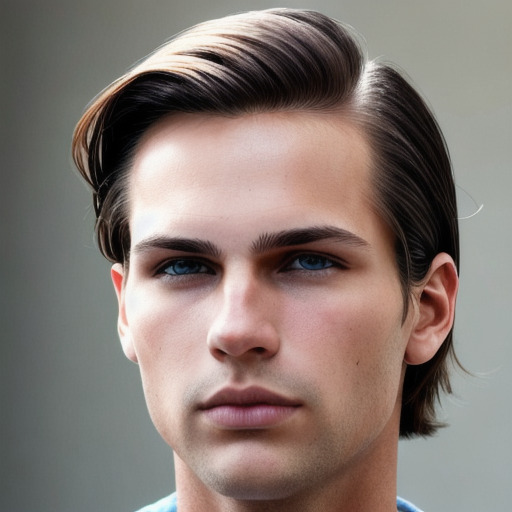

In [ ]:
print(f"Prompt: {prompt}")
print(f"Negative Prompt: {negative_prompt}")
image

Now lets ad the positive prompt to see uf the image gets better



In [ ]:
prompt = f"{base_prompt}, {pos_prompt}"
negative_prompt = None

generator = torch.Generator("cuda").manual_seed(1024)
with torch.autocast("cuda"):
      image = pipe(prompt=prompt,
                    negative_prompt=negative_prompt,
                    num_images_per_prompt=num_samples,
                    num_inference_steps=num_inference_steps,
                    generator=generator,
                    guidance_scale=guidance_scale).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt: The image shows a face of a real human. He has slicked back brown hair and dark brown eyes., hyper-detailed and intricate, realistic shaded, fine detail, realistic proportions, symmetrical, sharp focus, 8K resolution
Negative Prompt: None


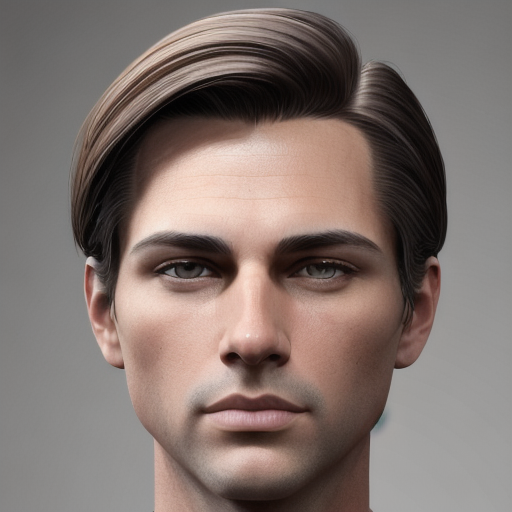

In [ ]:
print(f"Prompt: {prompt}")
print(f"Negative Prompt: {negative_prompt}")
image

Now lets add a negative prompt to see if the image gets better

In [ ]:
prompt = base_prompt
negative_prompt = neg_prompt

generator = torch.Generator("cuda").manual_seed(1024)
with torch.autocast("cuda"):
      image = pipe(prompt=prompt,
                    negative_prompt=negative_prompt,
                    num_images_per_prompt=num_samples,
                    num_inference_steps=num_inference_steps,
                    generator=generator,
                    guidance_scale=guidance_scale).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt: The image shows a face of a real human. He has slicked back brown hair and dark brown eyes.
Negative Prompt: drawing, cartoon, black-white


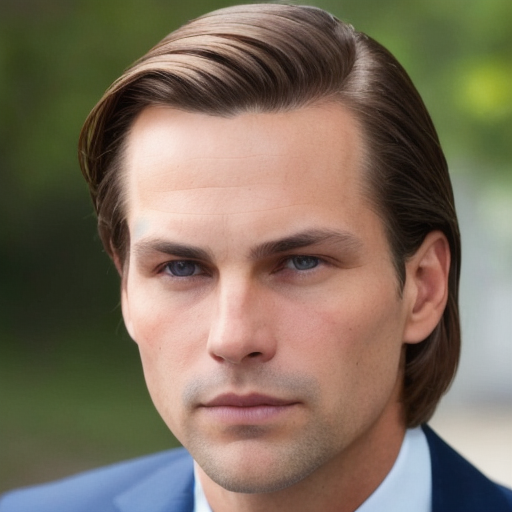

In [ ]:
print(f"Prompt: {prompt}")
print(f"Negative Prompt: {negative_prompt}")
image

We see the image is already better than before. lets check if we can add a specific style to render it more realistic.

In [ ]:
prompt = f"{base_prompt}, {pos_style}"
negative_prompt = neg_prompt

generator = torch.Generator("cuda").manual_seed(1024)
with torch.autocast("cuda"):
      image = pipe(prompt=prompt,
                    negative_prompt=negative_prompt,
                    num_images_per_prompt=num_samples,
                    num_inference_steps=num_inference_steps,
                    generator=generator,
                    guidance_scale=guidance_scale).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt: The image shows a face of a real human. He has slicked back brown hair and dark brown eyes., in the style of realistic
Negative Prompt: drawing, cartoon, black-white


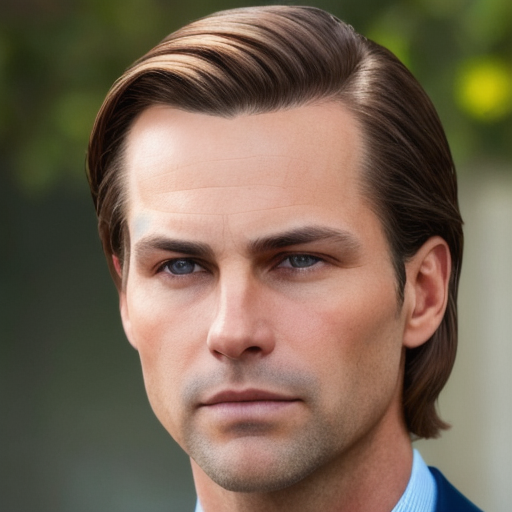

In [ ]:
print(f"Prompt: {prompt}")
print(f"Negative Prompt: {negative_prompt}")
image

## StabilityAI

In [ ]:
model_id = "stabilityai/stable-diffusion-2-base"
pipe = StableDiffusionPipeline.from_pretrained(model_id, revision="fp16", torch_dtype=torch.float16, safety_checker=None)

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Next, let's move the pipeline to GPU to have faster inference.

In [ ]:
pipe = pipe.to("cuda")

In [ ]:
base_prompt = augmented_imagedescription[1]

pos_prompt = "hyper-detailed and intricate, realistic shaded, fine detail, realistic proportions, symmetrical, sharp focus, 8K resolution"
pos_style = "in the style of realistic"
neg_prompt = "drawing, cartoon, black-white"
neg_token = "In the style of cartoon, drawing, black-white"

print(base_prompt)

The image shows a face of a real human. He has slicked back brown hair and dark brown eyes.


In [ ]:
num_inference_steps = 50
guidance_scale = 7.5

num_samples = 1 # may have to set to 2 OOM; if 16GB GPU, can go to 4.

Just the Baseprompt without any negative prompt

In [ ]:
prompt = base_prompt
negative_prompt = None

generator = torch.Generator("cuda").manual_seed(1024)
with torch.autocast("cuda"):
      image = pipe(prompt=prompt,
                    negative_prompt=negative_prompt,
                    num_images_per_prompt=num_samples,
                    num_inference_steps=num_inference_steps,
                    generator=generator,
                    guidance_scale=guidance_scale).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt: The image shows a face of a real human. He has slicked back brown hair and dark brown eyes.
Negative Prompt: None


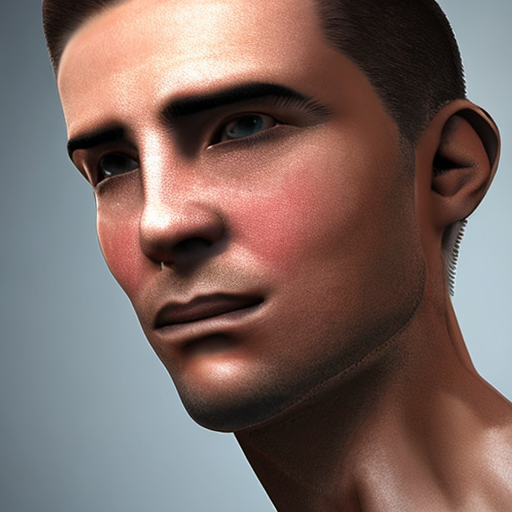

In [ ]:
print(f"Prompt: {prompt}")
print(f"Negative Prompt: {negative_prompt}")
image

Now lets ad the positive prompt to see uf the image gets better



In [ ]:
prompt = f"{base_prompt}, {pos_prompt}"
negative_prompt = None

generator = torch.Generator("cuda").manual_seed(1024)
with torch.autocast("cuda"):
      image = pipe(prompt=prompt,
                    negative_prompt=negative_prompt,
                    num_images_per_prompt=num_samples,
                    num_inference_steps=num_inference_steps,
                    generator=generator,
                    guidance_scale=guidance_scale).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt: The image shows a face of a real human. He has slicked back brown hair and dark brown eyes., hyper-detailed and intricate, realistic shaded, fine detail, realistic proportions, symmetrical, sharp focus, 8K resolution
Negative Prompt: None


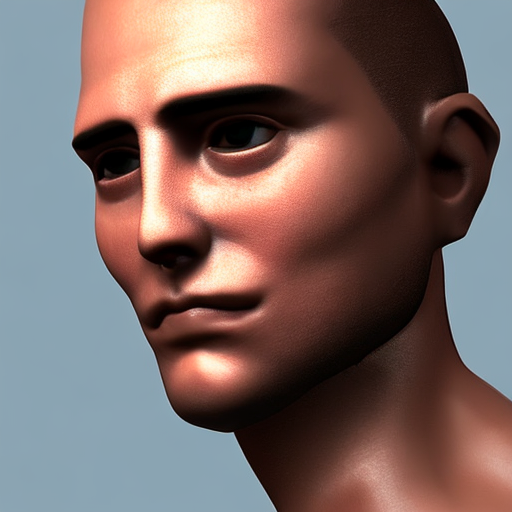

In [ ]:
print(f"Prompt: {prompt}")
print(f"Negative Prompt: {negative_prompt}")
image

Now lets add a negative prompt to see if the image gets better

In [ ]:
prompt = base_prompt
negative_prompt = neg_prompt

generator = torch.Generator("cuda").manual_seed(1024)
with torch.autocast("cuda"):
      image = pipe(prompt=prompt,
                    negative_prompt=negative_prompt,
                    num_images_per_prompt=num_samples,
                    num_inference_steps=num_inference_steps,
                    generator=generator,
                    guidance_scale=guidance_scale).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt: The image shows a face of a real human. He has slicked back brown hair and dark brown eyes.
Negative Prompt: drawing, cartoon, black-white


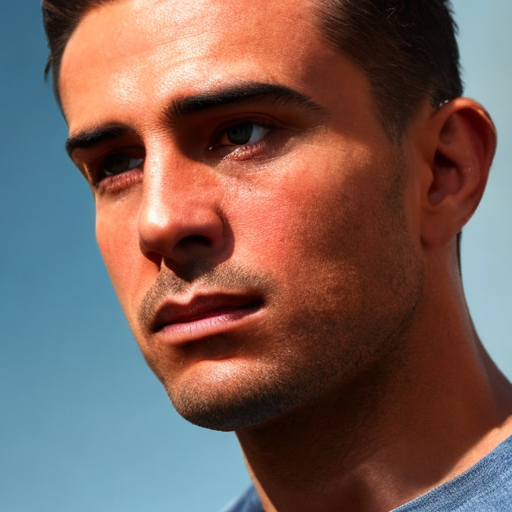

In [ ]:
print(f"Prompt: {prompt}")
print(f"Negative Prompt: {negative_prompt}")
image

We see the image is already better than before. lets check if we can add a specific style to render it more realistic.

In [ ]:
prompt = f"{base_prompt}, {pos_style}"
negative_prompt = neg_prompt

generator = torch.Generator("cuda").manual_seed(1024)
with torch.autocast("cuda"):
      image = pipe(prompt=prompt,
                    negative_prompt=negative_prompt,
                    num_images_per_prompt=num_samples,
                    num_inference_steps=num_inference_steps,
                    generator=generator,
                    guidance_scale=guidance_scale).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt: The image shows a face of a real human. He has slicked back brown hair and dark brown eyes., in the style of realistic
Negative Prompt: drawing, cartoon, black-white


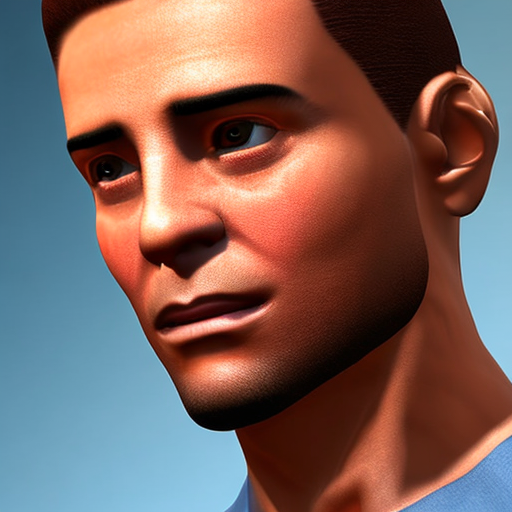

In [ ]:
print(f"Prompt: {prompt}")
print(f"Negative Prompt: {negative_prompt}")
image

---

**Interpretation**

As we see the negative prompts and the style as well do not have much influence on the generated image. But the image is not generated worse so we use it in the generation of the dataset.
Also the model realisticVisions is much better than the stabilityAI. 

---

## Generating the synthetic images

Now we create the synthetic images for the dataset. 
Based on the model evaluation before i use the model SG161222/Realistic_Vision_V1.4 without any negative prompts. 

To log the prompts used to generate the images i create a .csv File to save the prompts used for the synthetic image generation and the corresponding image name.

In [ ]:
import csv
path_dataset = "/content/gdrive/MyDrive/ML2/Exam_Project/Dataset/"

In [ ]:
with open(path_dataset + 'image_descriptions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    field = ["prompt", "image_name"]
    
    writer.writerow(field)
    
    file.close()  

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("SG161222/Realistic_Vision_V1.4", torch_dtype=torch.float16)  
pipe = pipe.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Generate the images from the prompts
- make sure the folders exist in your google drive. If they are not existing create them manually

In this batch I gnerate 4 Images for all 50 prompts --> 200 images are genereated. The prompts and the corresponding imagename are stored in a .csv document that we later can check the quality of the model.

In [ ]:
pos_prompt = "hyper-detailed and intricate, realistic shaded, fine detail, realistic proportions, symmetrical, sharp focus, 8K resolution"
pos_style = "in the style of realistic"
neg_prompt = "drawing, cartoon, black-white"
neg_token = "In the style of cartoon, drawing, black-white"

In [ ]:
images = []
prompt_number = 0
batch_number = 1

with open(path_dataset + '/image_descriptions.csv', 'a',) as file:
  writer = csv.writer(file)
  for base_prompt in augmented_imagedescription:
    prompt_number += 1
    for image_number in range(4):
      prompt = f"{base_prompt}, {pos_style}"
      negative_prompt = neg_prompt

      print(prompt)
      with torch.autocast("cuda"):
          image = pipe(prompt=prompt,
                        negative_prompt=negative_prompt,
                        num_images_per_prompt=num_samples,
                        num_inference_steps=num_inference_steps,
                        generator=generator,
                        guidance_scale=guidance_scale).images[0]
      
    
      # save it in the images list 
      images.append(image)

      # Save the image
      image_name = f"generated_image_realilstic_vision_{batch_number }_{prompt_number}_{image_number}.png"
      path = f"{path_dataset}AI/{image_name}" 
      image.save(path)

      #save the prompt and the imagename in a csv
      writer.writerow([prompt, image_name])

  file.close()


The image shows a face of a real human. She has blonde hair and blue eyes., in the style of realistic


  0%|          | 0/50 [00:00<?, ?it/s]

The image shows a face of a real human. She has blonde hair and blue eyes., in the style of realistic


  0%|          | 0/50 [00:00<?, ?it/s]

The image shows a face of a real human. She has blonde hair and blue eyes., in the style of realistic


  0%|          | 0/50 [00:00<?, ?it/s]

The image shows a face of a real human. She has blonde hair and blue eyes., in the style of realistic


  0%|          | 0/50 [00:00<?, ?it/s]

The image shows a face of a real human. He has slicked back brown hair and dark brown eyes., in the style of realistic


  0%|          | 0/50 [00:00<?, ?it/s]

The image shows a face of a real human. He has slicked back brown hair and dark brown eyes., in the style of realistic


  0%|          | 0/50 [00:00<?, ?it/s]

The image shows a face of a real human. He has slicked back brown hair and dark brown eyes., in the style of realistic


  0%|          | 0/50 [00:00<?, ?it/s]

The image shows a face of a real human. He has slicked back brown hair and dark brown eyes., in the style of realistic


  0%|          | 0/50 [00:00<?, ?it/s]

The image shows a face of a real human. She has curly black hair and hazel eyes., in the style of realistic


  0%|          | 0/50 [00:00<?, ?it/s]

The image shows a face of a real human. She has curly black hair and hazel eyes., in the style of realistic


  0%|          | 0/50 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 5>:15                                                                             │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py:115 in decorate_context       │
│                                                                                                  │
│   112 │   @functools.wraps(func)                                                                 │
│   113 │   def decorate_context(*args, **kwargs):                                                 │
│   114 │   │   with ctx_factory():                                                                │
│ ❱ 115 │   │   │   return func(*args, **kwargs)                                                   │
│   116 │                                                                                          │
│   117 │   return decorate_context                                                                │
│   118                                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_dif │
│ fusion.py:529 in __call__                                                                        │
│                                                                                                  │
│   526 │   │   │   │   latent_model_input = self.scheduler.scale_model_input(latent_model_input   │
│   527 │   │   │   │                                                                              │
│   528 │   │   │   │   # predict the noise residual                                               │
│ ❱ 529 │   │   │   │   noise_pred = self.unet(latent_model_input, t, encoder_hidden_states=text   │
│   530 │   │   │   │                                                                              │
│   531 │   │   │   │   # perform guidance                                                         │
│   532 │   │   │   │   if do_classifier_free_guidance:                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501 in _call_impl            │
│                                                                                                  │
│   1498 │   │   if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks   │
│   1499 │   │   │   │   or _global_backward_pre_hooks or _global_backward_hooks                   │
│   1500 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1501 │   │   │   return forward_call(*args, **kwargs)                                          │
│   1502 │   │   # Do not call functions when jit is used                                          │
│   1503 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1504 │   │   backward_pre_hooks = []                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/diffusers/models/unet_2d_condition.py:453 in forward     │
│                                                                                                  │
│   450 │   │   │   │   upsample_size = down_block_res_samples[-1].shape[2:]                       │
│   451 │   │   │                                                                                  │
│   452 │   │   │   if hasattr(upsample_block, "has_cross_attention") and upsample_block.has_cro   │
│ ❱ 453 │   │   │   │   sample = upsample_block(             

During the generation of the images, I encountered that a very detaild description of a face misleads the stable diffusion model. The generated faces look much more unrealistic than by a simple prompt. In this section I generate some faces with a simple prompt.
In this batch i generate 250 images for each prompt. --> 500 images are generated. Also the prompts and the corresponding image name are stored in a .csv file

In [ ]:
images = []
prompt_number = 0
batch_number = 2
prompts = ["face of a man", 'a face of a women']
with open(f'{path_dataset}image_descriptions.csv', 'a',) as file:
  writer = csv.writer(file)
  for prompt in prompts:
    prompt_number += 1
    for image_number in range(250):
      print(prompt)
      
      image = pipe(prompt).images[0]  # generate the image with stable diffusion
    
      # save it in the images list 
      images.append(image)

      # Save the image
      image_name = f"generated_image_realilstic_vision_simple_prompt_{batch_number}_{prompt_number}_{image_number}.png"
      path = f"{path_dataset}AI/{image_name}" 
      image.save(path)

      #save the prompt and the imagename in a csv
      writer.writerow([prompt, image_name])

  file.close()

Now check the images for that i import them from google drive. 
The rglob function lists all files with the given file extension.

In [ ]:
from PIL import Image
import pathlib

images = []
path = pathlib.Path(f"{path_dataset}AI")

cancel_token = 0

for file in path.rglob("*.png"):
  cancel_token += 1
  images.append(Image.open(file))
  #just load the first twelfe images to display them in a grid
  if cancel_token == 12:
    break

Create a helper function to display the generated images

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

Display the first twelve generated images

In [ ]:
grid = image_grid(images, rows=4, cols=3)
grid

Output hidden; open in https://colab.research.google.com to view.